In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
import os

import pandas as pd
import numpy as np

from source.babilong.metrics import compare_answers, TASK_LABELS

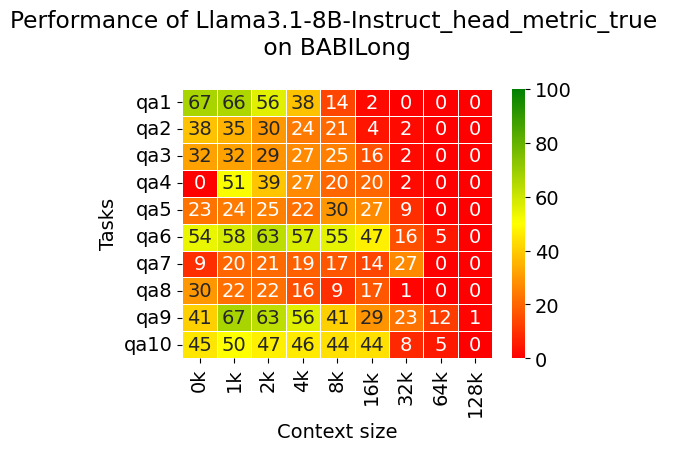

In [11]:
results_folder = './babilong_evals_ms_poe'
# model_name="Llama3-1"
model_name='Llama3.1-8B-Instruct_head_metric_true'
prompt_name = 'instruction_yes_examples_yes_post_prompt_yes_chat_template_yes'

tasks = ['qa1', 'qa2', 'qa3', 'qa4', 'qa5', 'qa6', 'qa7', 'qa8', 'qa9', 'qa10']
# tasks=['qa2','qa3','IF-qa2','IF-qa3']
lengths = [ 
    '0k','1k','2k',
    '4k','8k', '16k', '32k','64k','128k']

accuracy = np.zeros((len(tasks), len(lengths)))
for j, task in enumerate(tasks):
    # ptask=task if "IF" not in task else task[3:]
    ptask=task.split("-")[-1]
    for i, ctx_length in enumerate(lengths):
        fname = f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}.csv'
        if not os.path.isfile(fname):
            print(f'No such file: {fname}')
            continue

        df = pd.read_csv(fname)

        if df['output'].dtype != object:
            df['output'] = df['output'].astype(str)
        df['output'] = df['output'].fillna('')


        df['correct'] = df.apply(lambda row: compare_answers(row['target'], row['output'],
                                                             row['question'], TASK_LABELS[ptask]
                                                             ), axis=1)
        score = df['correct'].sum()
        accuracy[j, i] = 100 * score / len(df) if len(df) > 0 else 0

# Set large font sizes for better visibility in the PDF
matplotlib.rc('font', size=14)

# Create a colormap for the heatmap
cmap = LinearSegmentedColormap.from_list('ryg', ["red", "yellow", "green"], N=256)

# Create the heatmap
fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust the size as necessary
sns.heatmap(accuracy, cmap=cmap, vmin=0, vmax=100, annot=True, fmt=".0f",
            linewidths=.5, xticklabels=lengths, yticklabels=tasks, ax=ax)
ax.set_title(f'Performance of {model_name} \n on BABILong \n')
ax.set_xlabel('Context size')
ax.set_ylabel('Tasks')

# Save the figure to a PDF
# plt.savefig('all_tasks_performance.pdf', bbox_inches='tight')
plt.show()

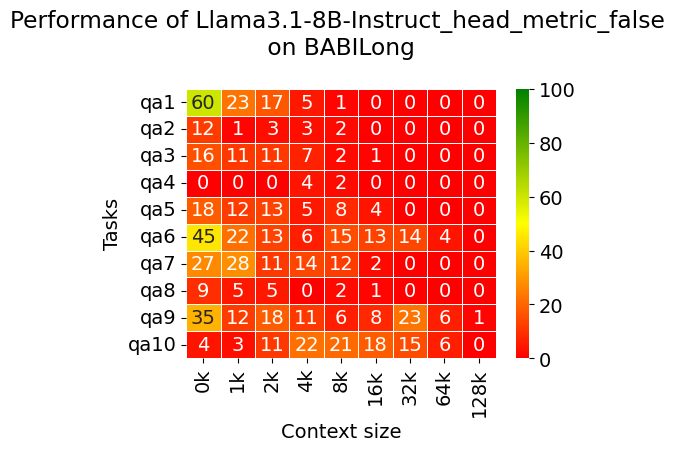

In [12]:
results_folder = './babilong_evals_ms_poe'
# model_name="Llama3-1"
model_name='Llama3.1-8B-Instruct_head_metric_false'
prompt_name = 'instruction_yes_examples_yes_post_prompt_yes_chat_template_yes'

tasks = ['qa1', 'qa2', 'qa3', 'qa4', 'qa5', 'qa6', 'qa7', 'qa8', 'qa9', 'qa10']
# tasks=['qa2','qa3','IF-qa2','IF-qa3']
lengths = [ 
    '0k','1k','2k',
    '4k','8k', '16k', '32k','64k','128k']

accuracy = np.zeros((len(tasks), len(lengths)))
for j, task in enumerate(tasks):
    # ptask=task if "IF" not in task else task[3:]
    ptask=task.split("-")[-1]
    for i, ctx_length in enumerate(lengths):
        fname = f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}.csv'
        if not os.path.isfile(fname):
            print(f'No such file: {fname}')
            continue

        df = pd.read_csv(fname)

        if df['output'].dtype != object:
            df['output'] = df['output'].astype(str)
        df['output'] = df['output'].fillna('')


        df['correct'] = df.apply(lambda row: compare_answers(row['target'], row['output'],
                                                             row['question'], TASK_LABELS[ptask]
                                                             ), axis=1)
        score = df['correct'].sum()
        accuracy[j, i] = 100 * score / len(df) if len(df) > 0 else 0

# Set large font sizes for better visibility in the PDF
matplotlib.rc('font', size=14)

# Create a colormap for the heatmap
cmap = LinearSegmentedColormap.from_list('ryg', ["red", "yellow", "green"], N=256)

# Create the heatmap
fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust the size as necessary
sns.heatmap(accuracy, cmap=cmap, vmin=0, vmax=100, annot=True, fmt=".0f",
            linewidths=.5, xticklabels=lengths, yticklabels=tasks, ax=ax)
ax.set_title(f'Performance of {model_name} \n on BABILong \n')
ax.set_xlabel('Context size')
ax.set_ylabel('Tasks')

# Save the figure to a PDF
# plt.savefig('all_tasks_performance.pdf', bbox_inches='tight')
plt.show()

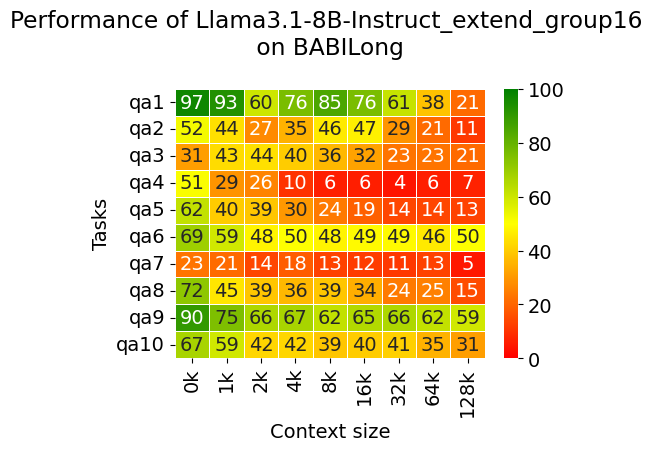

In [13]:
results_folder = './babilong_evals_ms_poe'
# model_name="Llama3-1"
model_name='Llama3.1-8B-Instruct_extend_group16'
prompt_name = 'instruction_yes_examples_yes_post_prompt_yes_chat_template_yes'

tasks = ['qa1', 'qa2', 'qa3', 'qa4', 'qa5', 'qa6', 'qa7', 'qa8', 'qa9', 'qa10']
# tasks=['qa2','qa3','IF-qa2','IF-qa3']
lengths = [ 
    '0k','1k','2k',
    '4k','8k', '16k', '32k','64k','128k']

g16_accuracy = np.zeros((len(tasks), len(lengths)))
for j, task in enumerate(tasks):
    # ptask=task if "IF" not in task else task[3:]
    ptask=task.split("-")[-1]
    for i, ctx_length in enumerate(lengths):
        fname = f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}.csv'
        if not os.path.isfile(fname):
            print(f'No such file: {fname}')
            continue

        df = pd.read_csv(fname)

        if df['output'].dtype != object:
            df['output'] = df['output'].astype(str)
        df['output'] = df['output'].fillna('')


        df['correct'] = df.apply(lambda row: compare_answers(row['target'], row['output'],
                                                             row['question'], TASK_LABELS[ptask]
                                                             ), axis=1)
        score = df['correct'].sum()
        g16_accuracy[j, i] = 100 * score / len(df) if len(df) > 0 else 0

# Set large font sizes for better visibility in the PDF
matplotlib.rc('font', size=14)

# Create a colormap for the heatmap
cmap = LinearSegmentedColormap.from_list('ryg', ["red", "yellow", "green"], N=256)

# Create the heatmap
fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust the size as necessary
sns.heatmap(g16_accuracy, cmap=cmap, vmin=0, vmax=100, annot=True, fmt=".0f",
            linewidths=.5, xticklabels=lengths, yticklabels=tasks, ax=ax)
ax.set_title(f'Performance of {model_name} \n on BABILong \n')
ax.set_xlabel('Context size')
ax.set_ylabel('Tasks')

# Save the figure to a PDF
# plt.savefig('all_tasks_performance.pdf', bbox_inches='tight')
plt.show()

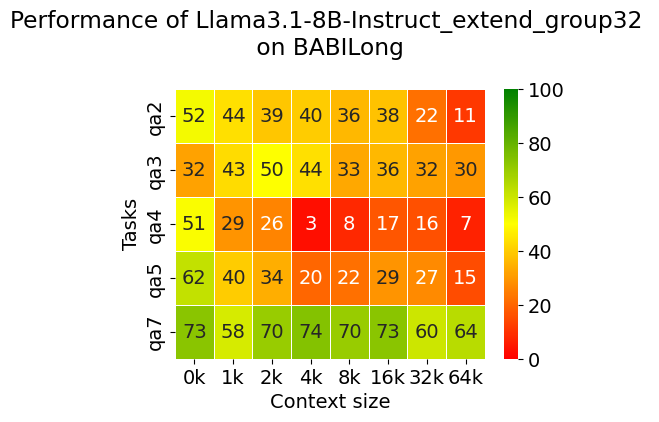

In [11]:
results_folder = './babilong_evals_ms_poe'
# model_name="Llama3-1"
model_name='Llama3.1-8B-Instruct_extend_group32'
prompt_name = 'instruction_yes_examples_yes_post_prompt_yes_chat_template_yes'

tasks = [
    # 'qa1',
      'qa2', 'qa3', 'qa4', 'qa5',
        # 'qa6',
          'qa7', 
        #   'qa8', 'qa9', 'qa10'
          ]
# tasks=['qa2','qa3','IF-qa2','IF-qa3']
lengths = [ 
    '0k','1k','2k',
    '4k','8k', '16k', '32k','64k',
    # '128k'
    ]

g32_accuracy = np.zeros((len(tasks), len(lengths)))
for j, task in enumerate(tasks):
    # ptask=task if "IF" not in task else task[3:]
    ptask=task.split("-")[-1]
    for i, ctx_length in enumerate(lengths):
        fname = f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}.csv'
        if not os.path.isfile(fname):
            print(f'No such file: {fname}')
            continue

        df = pd.read_csv(fname)

        if df['output'].dtype != object:
            df['output'] = df['output'].astype(str)
        df['output'] = df['output'].fillna('')


        df['correct'] = df.apply(lambda row: compare_answers(row['target'], row['output'],
                                                             row['question'], TASK_LABELS[ptask]
                                                             ), axis=1)
        score = df['correct'].sum()
        g32_accuracy[j, i] = 100 * score / len(df) if len(df) > 0 else 0

# Set large font sizes for better visibility in the PDF
matplotlib.rc('font', size=14)

# Create a colormap for the heatmap
cmap = LinearSegmentedColormap.from_list('ryg', ["red", "yellow", "green"], N=256)

# Create the heatmap
fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust the size as necessary
sns.heatmap(g32_accuracy, cmap=cmap, vmin=0, vmax=100, annot=True, fmt=".0f",
            linewidths=.5, xticklabels=lengths, yticklabels=tasks, ax=ax)
ax.set_title(f'Performance of {model_name} \n on BABILong \n')
ax.set_xlabel('Context size')
ax.set_ylabel('Tasks')

# Save the figure to a PDF
# plt.savefig('all_tasks_performance.pdf', bbox_inches='tight')
plt.show()

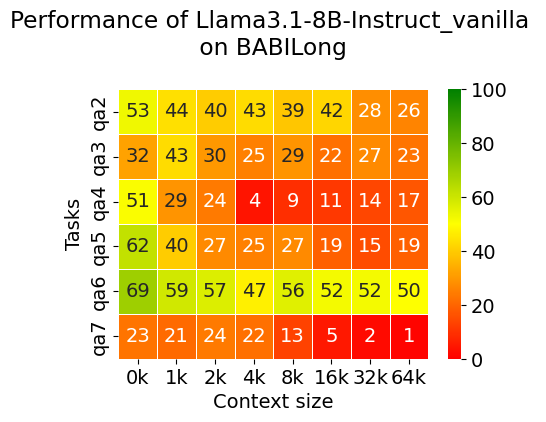

In [2]:
results_folder = './babilong_evals_ms_poe'
# model_name="Llama3-1"
model_name='Llama3.1-8B-Instruct_vanilla'
prompt_name = 'instruction_yes_examples_yes_post_prompt_yes_chat_template_yes'

tasks = [
    # 'qa1', 
    'qa2',
      'qa3', 'qa4', 'qa5',
        'qa6', 
        'qa7', 
        # 'qa8', 'qa9', 'qa10'
        ]
# tasks=['qa2','qa3','IF-qa2','IF-qa3']
lengths = [ 
    '0k','1k','2k',
    '4k','8k', '16k', '32k','64k',
    # '128k'
    ]



from source.babilong.metrics import compare_answers, TASK_LABELS

vanilla_accuracy = np.zeros((len(tasks), len(lengths)))
for j, task in enumerate(tasks):
    # ptask=task if "IF" not in task else task[3:]
    ptask=task.split("-")[-1]
    for i, ctx_length in enumerate(lengths):
        fname = f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}.csv'
        if not os.path.isfile(fname):
            print(f'No such file: {fname}')
            continue

        df = pd.read_csv(fname)

        if df['output'].dtype != object:
            df['output'] = df['output'].astype(str)
        df['output'] = df['output'].fillna('')


        df['correct'] = df.apply(lambda row: compare_answers(row['target'], row['output'],
                                                             row['question'], TASK_LABELS[ptask]
                                                             ), axis=1)
        score = df['correct'].sum()
        vanilla_accuracy[j, i] = 100 * score / len(df) if len(df) > 0 else 0

# Set large font sizes for better visibility in the PDF
matplotlib.rc('font', size=14)

# Create a colormap for the heatmap
cmap = LinearSegmentedColormap.from_list('ryg', ["red", "yellow", "green"], N=256)

# Create the heatmap
fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust the size as necessary
sns.heatmap(vanilla_accuracy, cmap=cmap, vmin=0, vmax=100, annot=True, fmt=".0f",
            linewidths=.5, xticklabels=lengths, yticklabels=tasks, ax=ax)
ax.set_title(f'Performance of {model_name} \n on BABILong \n')
ax.set_xlabel('Context size')
ax.set_ylabel('Tasks')

# Save the figure to a PDF
# plt.savefig('all_tasks_performance.pdf', bbox_inches='tight')
plt.show()

In [21]:
vanilla_accuracy

array([[97., 93., 90., 90., 84., 72., 55., 38., 15.],
       [53., 44., 40., 43., 39., 42., 28., 26.,  2.],
       [32., 43., 30., 25., 29., 22., 27., 23., 12.],
       [51., 29., 24.,  4.,  9., 11., 14., 17., 24.],
       [62., 40., 27., 25., 27., 19., 15., 19., 17.],
       [69., 59., 57., 47., 56., 52., 52., 50., 37.],
       [23., 21., 24., 22., 13.,  5.,  2.,  1.,  3.],
       [72., 45., 43., 41., 38., 28., 25., 19.,  9.],
       [90., 75., 71., 68., 66., 64., 67., 46., 43.],
       [67., 59., 47., 42., 45., 31., 45., 46., 27.]])

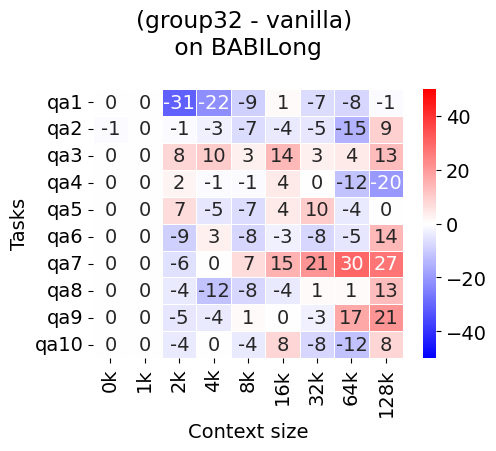

In [39]:
colors = ["blue", "white", "red"]  # 蓝色表示负值，白色是 0，红色表示正值
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust the size as necessary
sns.heatmap(g32_accuracy-vanilla_accuracy, cmap=cmap, vmin=-50, vmax=50, annot=True, fmt=".0f",
            linewidths=.5, xticklabels=lengths, yticklabels=tasks, ax=ax,)
ax.set_title(f'(group32 - vanilla) \n on BABILong \n')
ax.set_xlabel('Context size')
ax.set_ylabel('Tasks')
plt.show()

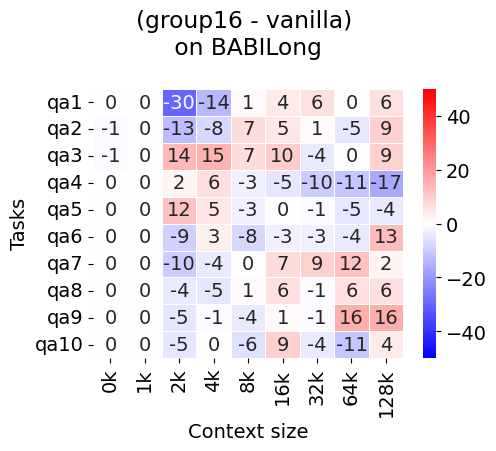

In [40]:
colors = ["blue", "white", "red"]  # 蓝色表示负值，白色是 0，红色表示正值
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust the size as necessary
sns.heatmap(g16_accuracy-vanilla_accuracy, cmap=cmap, vmin=-50, vmax=50, annot=True, fmt=".0f",
            linewidths=.5, xticklabels=lengths, yticklabels=tasks, ax=ax,)
ax.set_title(f'(group16 - vanilla) \n on BABILong \n')
ax.set_xlabel('Context size')
ax.set_ylabel('Tasks')
plt.show()

In [74]:
task_weight=np.array([1,2,3,4,5,6,7,8,9,10])[:,None]/5.5
task_weight=np.array([1,1,1,1,1,1,1,1,1,1])[:,None]

ctx_weight=10/4.5 - np.array([1,2,3,4,5,6,7,8,9])[None,:]/4.5
ctx_weight=np.array([1,1,1,1,1,1,1,1,1])[None,:]


mean_task_group16_acc=(task_weight*g16_accuracy).mean(axis=0)
mean_task_group32_acc=(task_weight*g32_accuracy).mean(axis=0)
mean_task_vanilla_acc=(task_weight*vanilla_accuracy).mean(axis=0)
mean_ctx_group16_acc=(ctx_weight*g16_accuracy).mean(axis=1)
mean_ctx_group32_acc=(ctx_weight*g32_accuracy).mean(axis=1)
mean_ctx_vanilla_acc=(ctx_weight*vanilla_accuracy).mean(axis=1)

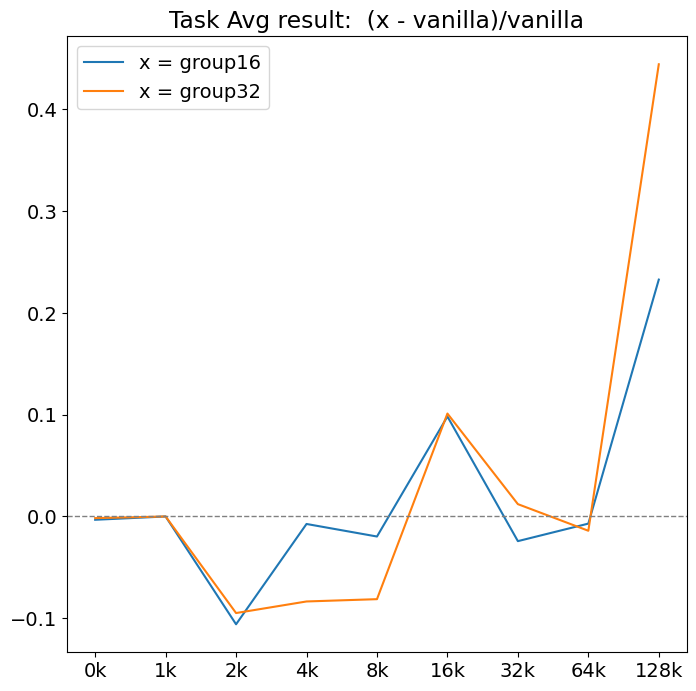

In [96]:
fig,ax=plt.subplots(figsize=(8,8))
ax.plot((mean_task_group16_acc-mean_task_vanilla_acc)/mean_task_vanilla_acc,label="x = group16")
ax.plot((mean_task_group32_acc-mean_task_vanilla_acc)/mean_task_vanilla_acc,label="x = group32")
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
# ax.plot(mean_task_vanilla_acc,label="vanilla")
plt.title("Task Avg result:  (x - vanilla)/vanilla")
plt.xticks(ticks=range(len(lengths)), labels=lengths)

plt.legend()
plt.show()

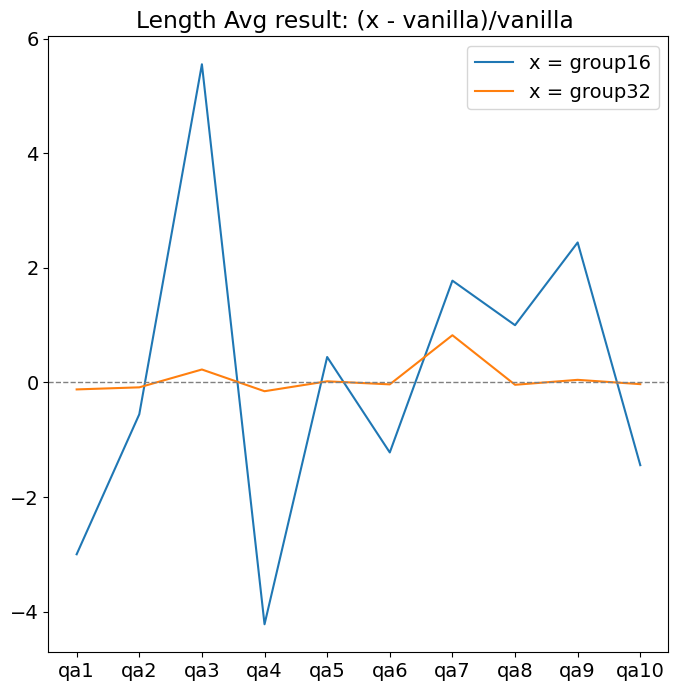

: 

In [97]:
fig,ax=plt.subplots(figsize=(8,8))
ax.plot(mean_ctx_group16_acc-mean_ctx_vanilla_acc,label="x = group16")
ax.plot((mean_ctx_group32_acc-mean_ctx_vanilla_acc)/mean_ctx_vanilla_acc,label="x = group32")
# ax.plot(mean_ctx_vanilla_acc,label="vanilla")
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)

plt.title("Length Avg result: (x - vanilla)/vanilla ")
plt.xticks(ticks=range(len(tasks)), labels=tasks)

plt.legend()
plt.show()

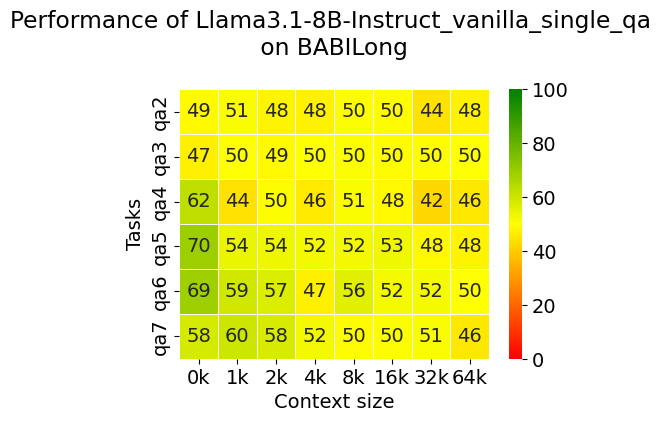

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
import os

import pandas as pd
import numpy as np
results_folder = './babilong_evals_single_qa_vanilla_llama'
# model_name="Llama3-1"
model_name='Llama3.1-8B-Instruct_vanilla'
prompt_name = 'instruction_yes_examples_yes_post_prompt_yes_chat_template_yes'
TASK_LABELS = {
 'qa2': ['bathroom', 'bedroom', 'garden', 'hallway', 'kitchen', 'office'], 
 'qa3': ['bathroom', 'bedroom', 'garden', 'hallway', 'kitchen', 'office'], 
 'qa4': ['bathroom', 'bedroom', 'garden', 'hallway', 'kitchen', 'office'], 
 'qa5': ['Bill', 'Fred', 'Jeff', 'Mary', 'apple', 'football', 'milk'], 
 'qa7': ['none', 'one', 'three', 'two'], 

}
tasks = [
    # 'qa1',
          'qa2', 'qa3', 'qa4', 'qa5', 
          'qa6',
            'qa7',
            #   'qa8', 'qa9', 'qa10'
              ]
# tasks=['qa2','qa3','IF-qa2','IF-qa3']
lengths = [ 
    '0k','1k','2k',
    '4k','8k', '16k', '32k','64k'
    # ,'128k'
    ]
def compare_answers(target, output, question, task_labels):
    return output.strip("$") in ("yes","no") and target in output

accuracy = np.zeros((len(tasks), len(lengths)))
for j, task in enumerate(tasks):
    # ptask=task if "IF" not in task else task[3:]
    if task == "qa6":
        accuracy[j ] = np.array([69,59,57,47,56,52,52,50])
        continue
    ptask=task.split("-")[-1]
    for i, ctx_length in enumerate(lengths):
        fname = f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}.csv'
        if not os.path.isfile(fname):
            print(f'No such file: {fname}')
            continue

        df = pd.read_csv(fname)

        if df['output'].dtype != object:
            df['output'] = df['output'].astype(str)
        df['output'] = df['output'].fillna('')


        df['correct'] = df.apply(lambda row: compare_answers(row['target'], row['output'],
                                                             row['question'], TASK_LABELS[ptask]
                                                             ), axis=1)
        score = df['correct'].sum()
        accuracy[j, i] = 100 * score / len(df) if len(df) > 0 else 0

# Set large font sizes for better visibility in the PDF
matplotlib.rc('font', size=14)

# Create a colormap for the heatmap
cmap = LinearSegmentedColormap.from_list('ryg', ["red", "yellow", "green"], N=256)

# Create the heatmap
fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust the size as necessary
sns.heatmap(accuracy, cmap=cmap, vmin=0, vmax=100, annot=True, fmt=".0f",
            linewidths=.5, xticklabels=lengths, yticklabels=tasks, ax=ax)
ax.set_title(f'Performance of {model_name}_single_qa \n on BABILong \n')
ax.set_xlabel('Context size')
ax.set_ylabel('Tasks')

# Save the figure to a PDF
# plt.savefig('all_tasks_performance.pdf', bbox_inches='tight')
plt.show()

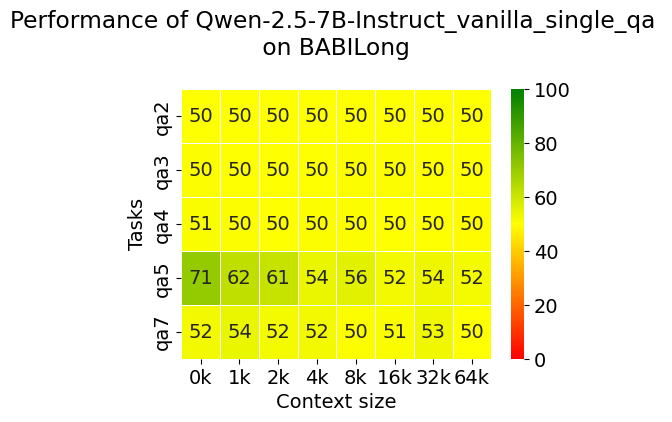

In [47]:
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
import os

import pandas as pd
import numpy as np
results_folder = './babilong_evals_single_qa_vanilla_llama'
# model_name="Llama3-1"
model_name="Qwen-2.5-7B-Instruct_vanilla"
prompt_name = 'instruction_yes_examples_yes_post_prompt_yes_chat_template_yes'
TASK_LABELS = {
 'qa2': ['bathroom', 'bedroom', 'garden', 'hallway', 'kitchen', 'office'], 
 'qa3': ['bathroom', 'bedroom', 'garden', 'hallway', 'kitchen', 'office'], 
 'qa4': ['bathroom', 'bedroom', 'garden', 'hallway', 'kitchen', 'office'], 
 'qa5': ['Bill', 'Fred', 'Jeff', 'Mary', 'apple', 'football', 'milk'], 
 'qa7': ['none', 'one', 'three', 'two'], 

}
tasks = [
    # 'qa1',
          'qa2', 'qa3', 'qa4', 'qa5', 
        #   'qa6',
            'qa7',
            #   'qa8', 'qa9', 'qa10'
              ]
# tasks=['qa2','qa3','IF-qa2','IF-qa3']
lengths = [ 
    '0k','1k','2k',
    '4k','8k', '16k', '32k','64k'
    # ,'128k'
    ]
def compare_answers(target, output, question, task_labels):
    
    # reverese = "yes" if target == "no" else "yes"
    # return (target in output) and (reverese not in output)
    
    return output.strip("$") in ("yes","no") and target in output

accuracy = np.zeros((len(tasks), len(lengths)))
for j, task in enumerate(tasks):
    # ptask=task if "IF" not in task else task[3:]
    ptask=task.split("-")[-1]
    for i, ctx_length in enumerate(lengths):
        fname = f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}.csv'
        if not os.path.isfile(fname):
            print(f'No such file: {fname}')
            continue

        df = pd.read_csv(fname)

        if df['output'].dtype != object:
            df['output'] = df['output'].astype(str)
        df['output'] = df['output'].fillna('')


        df['correct'] = df.apply(lambda row: compare_answers(row['target'], row['output'],
                                                             row['question'], TASK_LABELS[ptask]
                                                             ), axis=1)
        score = df['correct'].sum()
        accuracy[j, i] = 100 * score / len(df) if len(df) > 0 else 0

# Set large font sizes for better visibility in the PDF
matplotlib.rc('font', size=14)

# Create a colormap for the heatmap
cmap = LinearSegmentedColormap.from_list('ryg', ["red", "yellow", "green"], N=256)

# Create the heatmap
fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust the size as necessary
sns.heatmap(accuracy, cmap=cmap, vmin=0, vmax=100, annot=True, fmt=".0f",
            linewidths=.5, xticklabels=lengths, yticklabels=tasks, ax=ax)
ax.set_title(f'Performance of {model_name}_single_qa \n on BABILong \n')
ax.set_xlabel('Context size')
ax.set_ylabel('Tasks')

# Save the figure to a PDF
# plt.savefig('all_tasks_performance.pdf', bbox_inches='tight')
plt.show()

In [30]:
import re
s="no"

ret=re.search("([a-z]?no[a-z]?)",s)
# if ret:
#     print(1)
ret.group()

'no'

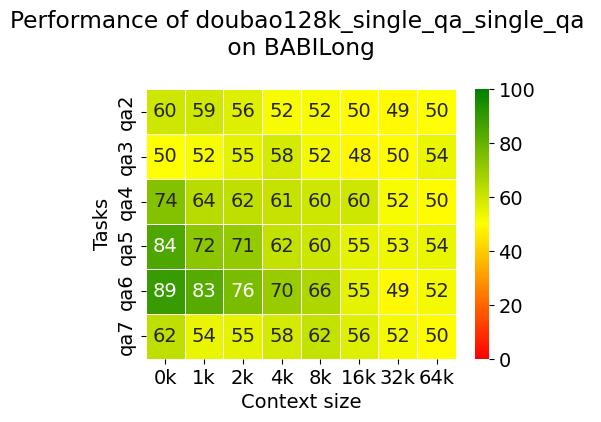

In [54]:
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
import os

import pandas as pd
import numpy as np
results_folder = './babilong_evals'
# model_name="Llama3-1"
model_name = "doubao128k_single_qa"
prompt_name = 'instruction_yes_examples_yes_post_prompt_yes_chat_template_yes'
TASK_LABELS = {
 'qa2': ['bathroom', 'bedroom', 'garden', 'hallway', 'kitchen', 'office'], 
 'qa3': ['bathroom', 'bedroom', 'garden', 'hallway', 'kitchen', 'office'], 
 'qa4': ['bathroom', 'bedroom', 'garden', 'hallway', 'kitchen', 'office'], 
 'qa5': ['Bill', 'Fred', 'Jeff', 'Mary', 'apple', 'football', 'milk'], 
  'qa6': ['no', 'yes'], 
 'qa7': ['none', 'one', 'three', 'two'], 

}
tasks = [
    # 'qa1',
          'qa2', 'qa3', 'qa4', 'qa5', 
          'qa6',
            'qa7',
            #   'qa8', 'qa9', 'qa10'
              ]
# tasks=['qa2','qa3','IF-qa2','IF-qa3']
lengths = [ 
    '0k','1k','2k',
    '4k','8k', '16k', '32k','64k'
    # ,'128k'
    ]
def compare_answers(target, output, question, task_labels):
    output = output.lower()
    reverese = "yes" if (target.lower() == "no") else "no"
    ret = re.search(f"([a-z]?{target}[a-z]?)",output)
    rret = re.search(f"([a-z]?{reverese}[a-z]?)",output)
    return (ret is not None) and (ret.group() == target) and \
        ((rret is None) or ( rret.group() != reverese))
    # return (target in output) and (reverese not in output)
    return output.strip(" ").strip("$") in ("yes","no") and target in output

accuracy = np.zeros((len(tasks), len(lengths)))
for j, task in enumerate(tasks):

    # ptask=task if "IF" not in task else task[3:]
    ptask=task.split("-")[-1]
    for i, ctx_length in enumerate(lengths):
        fname = f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}.csv'
        if not os.path.isfile(fname):
            print(f'No such file: {fname}')
            continue

        df = pd.read_csv(fname)

        if df['output'].dtype != object:
            df['output'] = df['output'].astype(str)
        df['output'] = df['output'].fillna('')


        df['correct'] = df.apply(lambda row: compare_answers(row['target'], row['output'],
                                                             row['question'], TASK_LABELS[ptask]
                                                             ), axis=1)
        score = df['correct'].sum()
        accuracy[j, i] = 100 * score / len(df) if len(df) > 0 else 0

# Set large font sizes for better visibility in the PDF
matplotlib.rc('font', size=14)

# Create a colormap for the heatmap
cmap = LinearSegmentedColormap.from_list('ryg', ["red", "yellow", "green"], N=256)

# Create the heatmap
fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust the size as necessary
sns.heatmap(accuracy, cmap=cmap, vmin=0, vmax=100, annot=True, fmt=".0f",
            linewidths=.5, xticklabels=lengths, yticklabels=tasks, ax=ax)
ax.set_title(f'Performance of {model_name}_single_qa \n on BABILong \n')
ax.set_xlabel('Context size')
ax.set_ylabel('Tasks')

# Save the figure to a PDF
# plt.savefig('all_tasks_performance.pdf', bbox_inches='tight')
plt.show()